In [1]:
import json
import os
from matplotlib import pyplot as plt
import pandas as pd


In [2]:

# open all.json
os.system("wget -r https://epic.gsfc.nasa.gov/api/enhanced/all")
os.rename("epic.gsfc.nasa.gov/api/enhanced/all", "epic.gsfc.nasa.gov/api/enhanced/all.json")


--2023-11-20 14:11:53--  https://epic.gsfc.nasa.gov/api/enhanced/all
Resolving epic.gsfc.nasa.gov (epic.gsfc.nasa.gov)... 2001:4d0:2310:170::112, 129.164.142.112
Connecting to epic.gsfc.nasa.gov (epic.gsfc.nasa.gov)|2001:4d0:2310:170::112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘epic.gsfc.nasa.gov/api/enhanced/all’

     0K .......... .......... .......... .......... ..........  233K
    50K .......... .......... .......... .......... ..........  464K
   100K .......... .......... .......... .......... .......... 42.0M
   150K .......... .......... .......... .......... ..........  471K
   200K .......... .......... .......... .......... ..........  101M
   250K .......... .......... .                                 187M=0.4s

2023-11-20 14:11:54 (630 KB/s) - ‘epic.gsfc.nasa.gov/api/enhanced/all’ saved [277575]

FINISHED --2023-11-20 14:11:54--
Total wall clock time: 1.3s
Downloaded: 1 files, 271K in 0.4s (630

In [3]:

def contruct_date_list(): 
    dates = []
    with open("epic.gsfc.nasa.gov/api/enhanced/all.json") as f:
        data = json.load(f)
        for d in data:
            dates.append(d["date"])
    return dates

dates = contruct_date_list()
            
image_folders = []
# construct all image folder urls
for d in dates:
    image_folders.append(f"https://epic.gsfc.nasa.gov/api/enhanced/date/{d}")
print(len(image_folders))
print(len(dates))
print(image_folders[0])


12617
12617
https://epic.gsfc.nasa.gov/api/enhanced/date/2023-11-17


# PLEASE REMOVE DUPLICATES !!!!!111!!!11!1!1! Danger Below

In [4]:
# make all image folders
''' os.system("mkdir images")
for i in range(len(dates)):
    os.system(f"mkdir images/{dates[i]}")
    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")
    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '''


' os.system("mkdir images")\nfor i in range(len(dates)):\n    os.system(f"mkdir images/{dates[i]}")\n    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")\n    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '

In [5]:
folders = os.listdir("images")
folders.sort()
if ".DS_Store" in folders:
    folders.remove(".DS_Store")
len(folders)
for i in range(len(folders)):
    os.system(f"cp images/{folders[i]}/{folders[i]}.json combined")


In [6]:
files = os.listdir("combined")
if ".DS_Store" in files:
    files.remove(".DS_Store")
print(files)

['2016-07-22.json', '2022-04-11.json', '2020-11-18.json', '2019-01-21.json', '2020-03-25.json', '2018-09-05.json', '2017-01-18.json', '2017-03-25.json', '2017-11-18.json', '2018-05-26.json', '2023-10-16.json', '2021-07-22.json', '2020-12-08.json', '2022-07-01.json', '2016-08-11.json', '2017-02-08.json', '2018-08-28.json', '2023-03-06.json', '2021-08-11.json', '2017-12-08.json', '2020-07-31.json', '2022-10-05.json', '2017-07-31.json', '2015-10-05.json', '2023-04-02.json', '2023-08-21.json', '2020-08-02.json', '2022-03-15.json', '2022-01-28.json', '2016-10-26.json', '2019-04-18.json', '2019-06-25.json', '2022-11-28.json', '2020-04-21.json', '2015-11-28.json', '2017-04-21.json', '2018-12-22.json', '2023-07-12.json', '2021-10-26.json', '2018-02-22.json', '2022-10-13.json', '2020-07-27.json', '2019-05-23.json', '2016-03-20.json', '2021-03-20.json', '2018-01-24.json', '2018-03-19.json', '2023-06-29.json', '2023-04-14.json', '2015-10-13.json', '2017-07-27.json', '2018-11-24.json', '2020-08-14

Text(0.5, 0, 'Longitude in °')

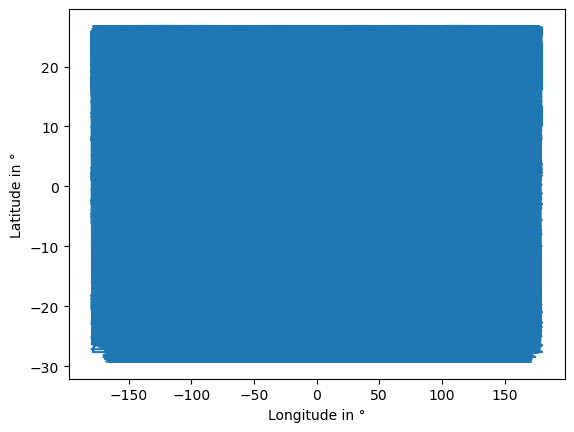

In [7]:
lat_coordinates = []
lon_coordinates = []
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])

plt.plot(lon_coordinates, lat_coordinates)
plt.ylabel("Latitude in °")
plt.xlabel("Longitude in °")

        

In [8]:
df_lat = pd.DataFrame(lat_coordinates)
df_lon = pd.DataFrame(lon_coordinates)
print("lat describe: ")
print(df_lat.describe())
print("---------------")
print("lon describe: ")
print(df_lon.describe())

lat describe: 
                  0
count  39359.000000
mean       4.399146
std       16.958279
min      -29.274902
25%       -9.228516
50%        8.811035
75%       19.519043
max       26.770020
---------------
lon describe: 
                  0
count  39359.000000
mean       3.941364
std      101.847247
min     -179.963379
25%      -83.803711
50%        5.866699
75%       91.567383
max      180.000000


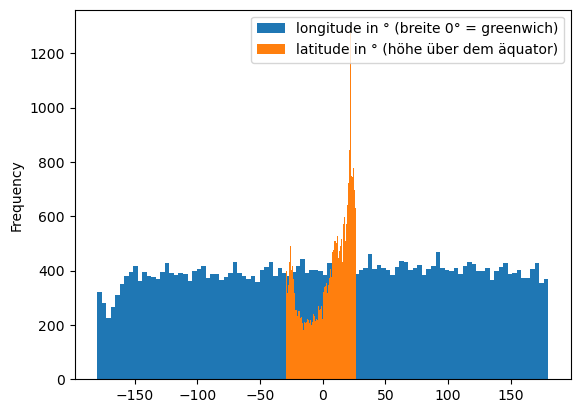

In [9]:
# make distribution of lat and lon
plt.hist(lon_coordinates, bins=100, label="longitude in ° (breite 0° = greenwich)")
plt.ylabel("Frequency")
plt.hist(lat_coordinates, bins=100, label="latitude in ° (höhe über dem äquator)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


![Explanation for you <3](https://s3.us-east-2.amazonaws.com/journeynorth.org/images/graphics/mclass/Lat_Long.gif)